In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch

In [3]:
# use path if the file is open using the github repository
# path = '../dataset/cleaned_data.csv'

# The path is specific you my(Jainish) directory only.
path = "/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv"
data = pd.read_csv(path)
print(data.head())

                                                text  generated
0  carfree cities become subject increasing inter...          1
1  car free cities carfree cities concept gaining...          1
2  sustainable urban future carfree cities emergi...          1
3  pioneering sustainable urban living era marked...          1
4  path sustainable urban living age rapid urbani...          1


In [4]:
data['text'].isna().sum()

1

In [5]:
data['text'] = data['text'].fillna('')

In [6]:
data['text'].isna().sum()

0

In [7]:
data['generated'].isna().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

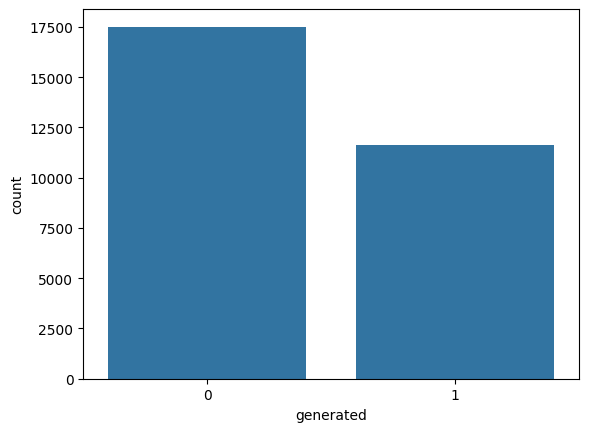

In [8]:
sns.countplot(x=data['generated'])
plt.show

In [9]:
def balance_labels(df, label_column='generated'):
    label_counts=df[label_column].value_counts()
    max_count=label_counts.max()

    balanced_df=pd.DataFrame()

    for label, count in label_counts.items():
        label_subset = df[df[label_column]==label]
        oversampled_subset= label_subset.sample(n=(max_count-count), replace=True, random_state=42)
        balanced_df = pd.concat([balanced_df, label_subset, oversampled_subset], ignore_index=True)

    return balanced_df

In [10]:
data=balance_labels(data)

<function matplotlib.pyplot.show(close=None, block=None)>

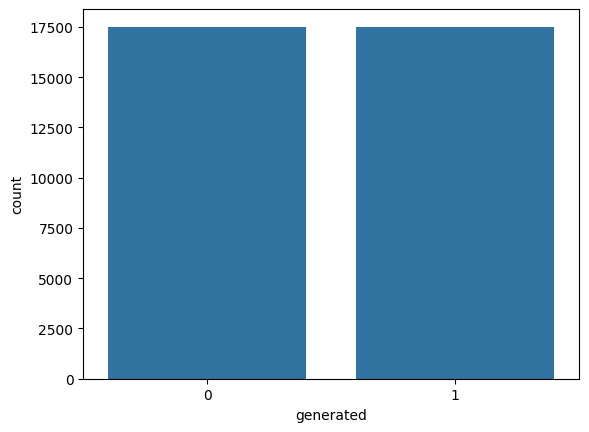

In [11]:
sns.countplot(x=data['generated'])
plt.show

In [12]:
X= data['text']
y= data['generated']

In [13]:
tfidfvectorizer = TfidfVectorizer(max_features=5000)

X_tfidf = tfidfvectorizer.fit_transform(X)

In [14]:
X_tfidf_dense = X_tfidf.toarray()

In [15]:
X_train, X_val, y_train, y_val= train_test_split(X_tfidf_dense, y, test_size= 0.2, random_state= 42)

In [ ]:
# Base LSTM model
model = Sequential()
model.add(Embedding(5000, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
876/876 [==============================] - 176s 195ms/step - loss: 0.6933 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.4957
Epoch 2/10
876/876 [==============================] - 157s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4957
Epoch 3/10
876/876 [==============================] - 157s 180ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5043
Epoch 4/10
876/876 [==============================] - 156s 178ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5043
Epoch 5/10
876/876 [==============================] - 148s 169ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6933 - val_accuracy: 0.4957
Epoch 6/10
876/876 [==============================] - 146s 167ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4957
Epoch 7/10
876/876 [==============================] - 149s 170ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 -

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(cr)


219/219 [==============================] - 14s 60ms/step
Confusion Matrix:
[[3472    0]
 [3532    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      3472
           1       0.00      0.00      0.00      3532

    accuracy                           0.50      7004
   macro avg       0.25      0.50      0.33      7004
weighted avg       0.25      0.50      0.33      7004



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


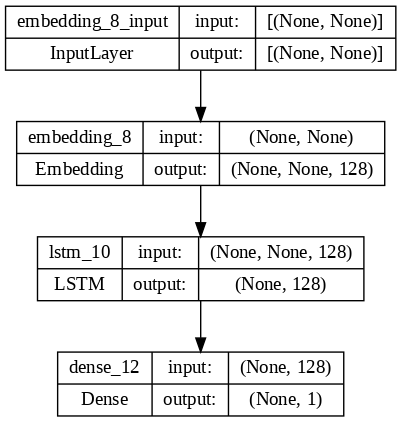

In [ ]:
tf.keras.utils.plot_model(model=model,show_shapes=True, dpi=100)

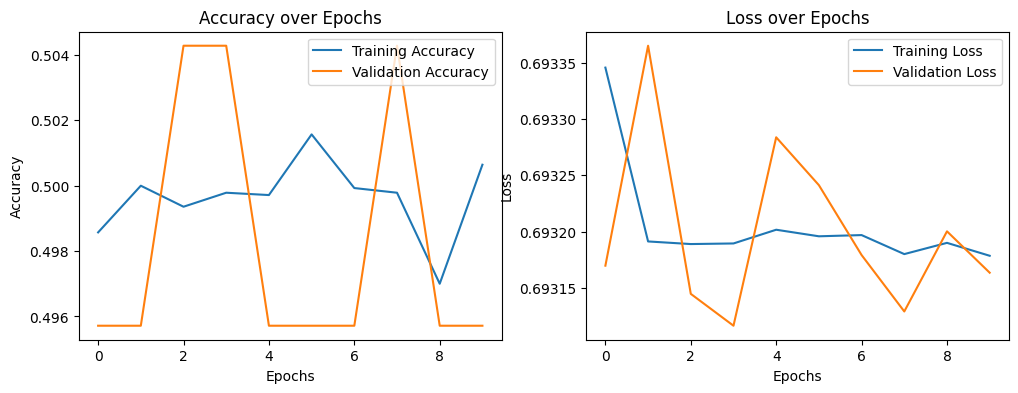

In [ ]:
# Training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
from tensorflow.keras.layers import Dropout, Bidirectional, SpatialDropout1D

# bidirectional LSTM model with dropout regularization
model_2 = Sequential()
model_2.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))
model_2.add(SpatialDropout1D(0.2))
model_2.add(Bidirectional(LSTM(128, return_sequences=True)))
model_2.add(Dropout(0.2))
model_2.add(Bidirectional(LSTM(64)))
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
438/438 [==============================] - 369s 823ms/step - loss: 0.6936 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.4957
Epoch 2/10
438/438 [==============================] - 346s 790ms/step - loss: 0.6934 - accuracy: 0.4991 - val_loss: 0.6936 - val_accuracy: 0.4957
Epoch 3/10
438/438 [==============================] - 356s 813ms/step - loss: 0.6933 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4957
Epoch 4/10
438/438 [==============================] - 346s 789ms/step - loss: 0.6933 - accuracy: 0.4962 - val_loss: 0.6932 - val_accuracy: 0.4957
Epoch 5/10
438/438 [==============================] - 355s 812ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5043
Epoch 6/10
438/438 [==============================] - 356s 813ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5043
Epoch 7/10
438/438 [==============================] - 356s 813ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6931 -

In [20]:
y_pred = model_2.predict(X_val)
Y_pred = np.round(y_pred).flatten()
Y_test = np.array(y_val)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

219/219 [==============================] - 52s 231ms/step
MSE: 0.49571673329525984
RMSE: 0.7040715398986526
MAE: 0.49571673329525984
R²: -0.9830124575311445


In [22]:
y_pred_classes = (y_pred > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[   0 3472]
 [   0 3532]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3472
           1       0.50      1.00      0.67      3532

    accuracy                           0.50      7004
   macro avg       0.25      0.50      0.34      7004
weighted avg       0.25      0.50      0.34      7004



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


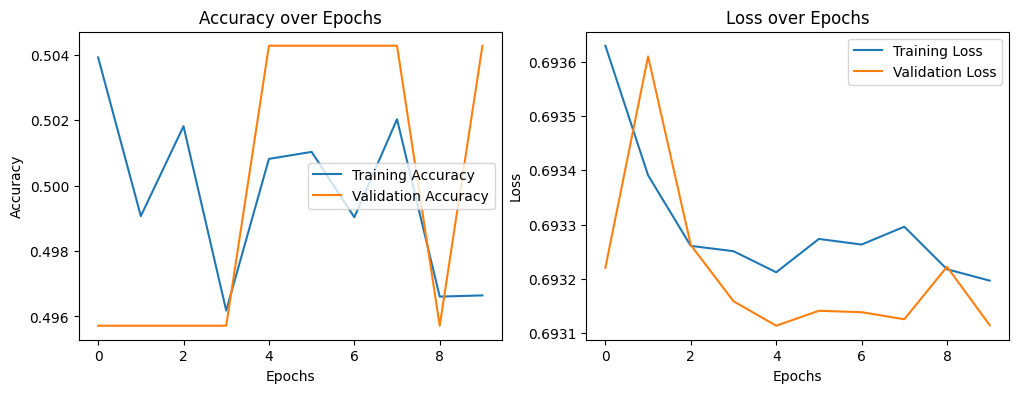

In [23]:
# Training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

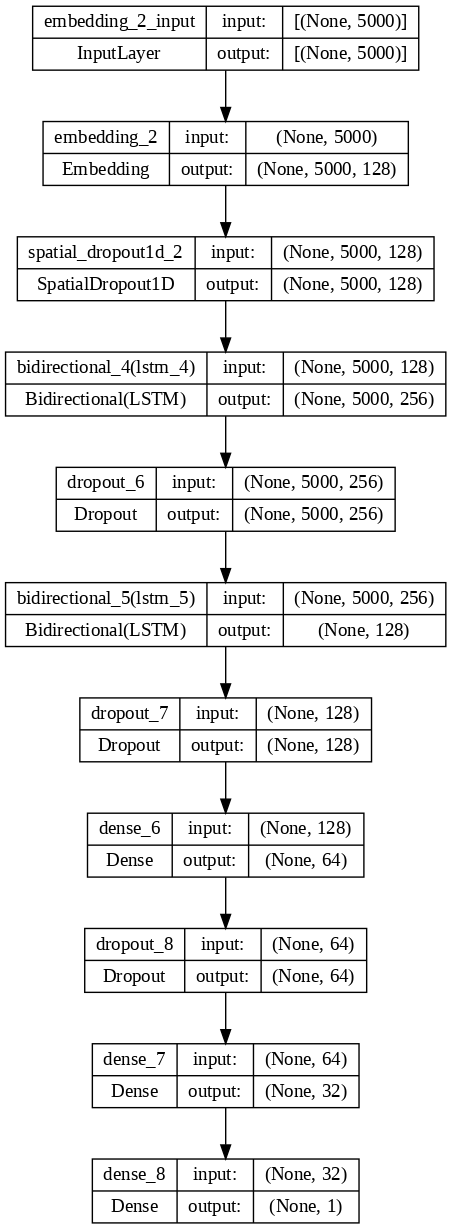

In [24]:
tf.keras.utils.plot_model(model=model_2,show_shapes=True, dpi=100)

In [25]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

maxlen = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen)

model_3 = Sequential()
model_3.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model_3.add(SpatialDropout1D(0.3))
model_3.add(Bidirectional(LSTM(128, return_sequences=True)))
model_3.add(Dropout(0.3))
model_3.add(Bidirectional(LSTM(64)))
model_3.add(Dropout(0.3))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_3 = model_3.fit(X_train_pad, y_train, epochs=20, batch_size=8, validation_data=(X_val_pad, y_val), callbacks=[early_stopping])

Epoch 1/20
3502/3502 [==============================] - 221s 47ms/step - loss: 0.1525 - accuracy: 0.9411 - val_loss: 0.1426 - val_accuracy: 0.9510
Epoch 2/20
3502/3502 [==============================] - 125s 36ms/step - loss: 0.0365 - accuracy: 0.9895 - val_loss: 0.0406 - val_accuracy: 0.9889
Epoch 3/20
3502/3502 [==============================] - 120s 34ms/step - loss: 0.0176 - accuracy: 0.9953 - val_loss: 0.0255 - val_accuracy: 0.9939
Epoch 4/20
3502/3502 [==============================] - 121s 34ms/step - loss: 0.0154 - accuracy: 0.9961 - val_loss: 0.0182 - val_accuracy: 0.9950
Epoch 5/20
3502/3502 [==============================] - 121s 35ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0214 - val_accuracy: 0.9953
Epoch 6/20
3502/3502 [==============================] - 117s 34ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0256 - val_accuracy: 0.9933
Epoch 7/20
3502/3502 [==============================] - 118s 34ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0

In [27]:
y_pred = model_3.predict(X_val_pad)
Y_pred = np.round(y_pred).flatten()
Y_test = np.array(y_val)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

219/219 [==============================] - 4s 12ms/step
MSE: 0.004997144488863506
RMSE: 0.07069048372209308
MAE: 0.004997144488863506
R²: 0.9800099550652103


In [28]:
y_pred_classes = (y_pred > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[3450   22]
 [  13 3519]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3472
           1       0.99      1.00      1.00      3532

    accuracy                           1.00      7004
   macro avg       1.00      0.99      1.00      7004
weighted avg       1.00      1.00      1.00      7004



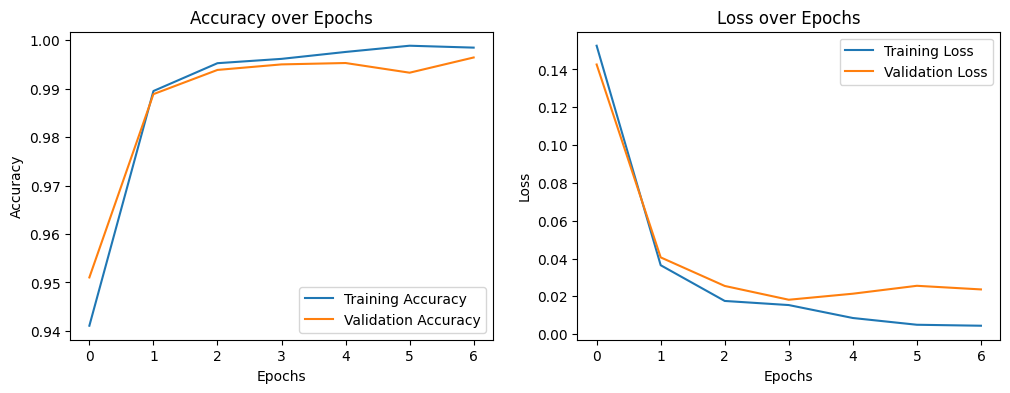

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

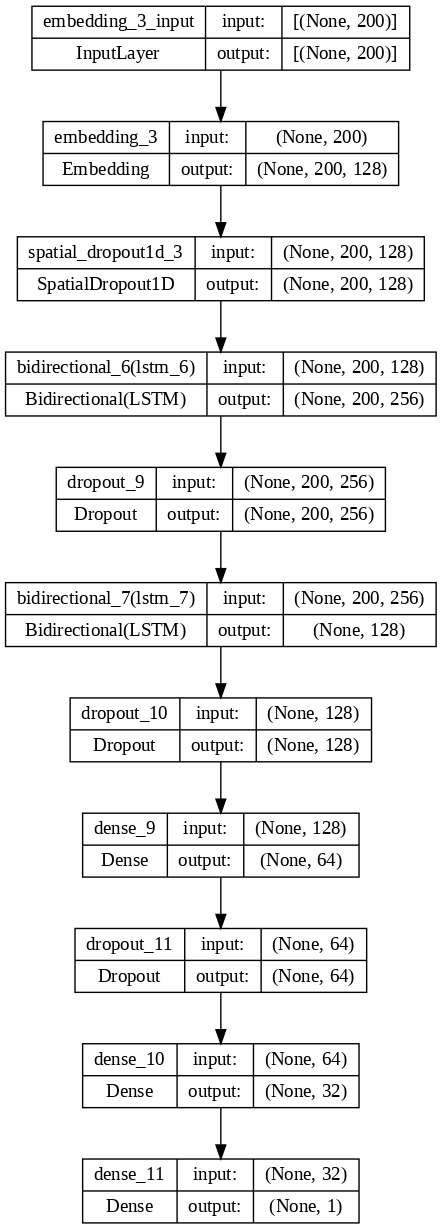

In [30]:
tf.keras.utils.plot_model(model=model_3,show_shapes=True, dpi=100)

In [35]:
# Saving the entire model using Keras's save method
model_3.save('/content/drive/MyDrive/Colab Notebooks/LSTM_model.keras')